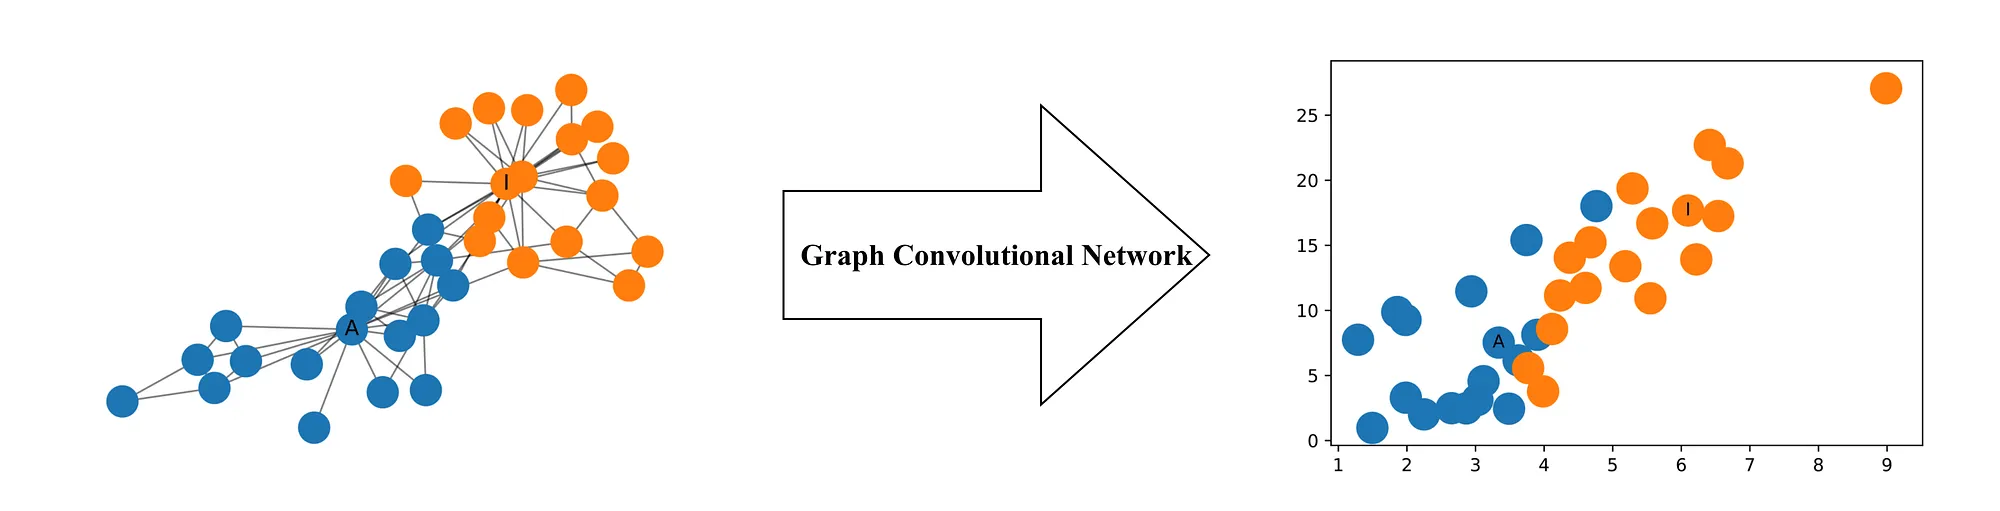

In [39]:
import numpy as np


## 1. 邻接矩阵 $A$

In [40]:
A = np.array([
    [0, 1, 0, 0],
    [0, 0, 1, 1], 
    [0, 1, 0, 0],
    [1, 0, 1, 0]],
    dtype=float
)
print(A)

[[0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]]


## 2. 节点特征 $X$

In [41]:
# 基于每个节点的索引为其生成两个整数特征
X = np.array([[i, -i] for i in range(A.shape[0])], dtype=float)
print(X)

[[ 0.  0.]
 [ 1. -1.]
 [ 2. -2.]
 [ 3. -3.]]


## 3. 利用邻接矩阵聚合邻居信息
矩阵 $A$ 和 $X$ 分别为：
$$
A = \begin{bmatrix}
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 \\
0 & 1 & 0 & 0 \\
1 & 0 & 1 & 0
\end{bmatrix}, \quad
X = \begin{bmatrix}
0 & 0 \\
1 & -1 \\
2 & -2 \\
3 & -3
\end{bmatrix}
$$


#### (1) 直接将相邻节点特征的和，作为节点的表征：$AX$

In [42]:
np.dot(A, X)

array([[ 1., -1.],
       [ 5., -5.],
       [ 1., -1.],
       [ 2., -2.]])

#### 存在的问题：
* 节点的聚合表征不包含它自己的特征  
 
* 度大的节点在其特征表征中将具有较大的值，度小的节点将具有较小的值。

#### (2) 添加自环与归一化：$D^{-1}(A+I)X$ 

In [44]:
# 添加自环
I = np.array(np.eye(A.shape[0]))
A_hat = A + I

print("A_hat:\n", A_hat, "\n")


# 对特征表征进行归一化处理
D = np.array(np.sum(A, axis=0))  # 节点度
D_inv = np.array(np.diag(1.0/D))           # 节点度矩阵 
print("D:\n", D, "\n")
print("D_inv:\n", D_inv, "\n")


A_hat:
 [[1. 1. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 1. 0.]
 [1. 0. 1. 1.]] 

D:
 [1. 2. 2. 1.] 

D_inv:
 [[1.  0.  0.  0. ]
 [0.  0.5 0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.  0.  1. ]] 



In [45]:
D_inv @ A_hat @ X 

array([[ 1. , -1. ],
       [ 3. , -3. ],
       [ 1.5, -1.5],
       [ 5. , -5. ]])

#### (3) 添加权重与激活函数：$\sigma(D^{-1}(A+I)XW)$

In [46]:
W = np.array([[1, -1],[-1, 1]])
print("W:\n", W)

W:
 [[ 1 -1]
 [-1  1]]


In [47]:
def relu(x):
    return np.maximum(0, x)

relu(D_inv @ A_hat @ X @ W)

array([[ 2.,  0.],
       [ 6.,  0.],
       [ 3.,  0.],
       [10.,  0.]])